In [5]:
import sys
sys.path.append('../cmake-build-release-gcc/src/')
import numpy as np
import pyslise as ps
var("x, y")
#V = fast_callable(2*(.5*(x^2+y^2) + 1/4/sqrt(5)*x*(y^2-1/3*x^2)), vars=[x, y], domain=float)
V = fast_callable((1+x^2)*(1+y^2), vars=[x, y], domain=float)
p2d = ps.PySE2d(V, -5.5,5.5, -5.5,5.5,
                x_count=29, y_count=41, in_sector_count=3, N=12)

In [21]:
n = p2d.N
E = 8.1
xs = np.linspace(-3, 3, 1000)
#ds1 = [np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0]) for x in xs]
#ds2 = [np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0]) for x in xs]
ds3 = [np.linalg.det(p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0] - p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0]) for x in xs]

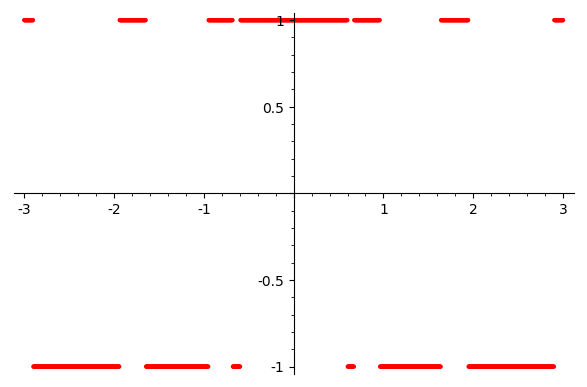

In [22]:
#(list_plot(zip(xs, map(sign,ds1)))
# +list_plot(zip(xs, map(sign,ds2)), color="green")
list_plot(zip(xs, map(sign,ds3)), color="red")

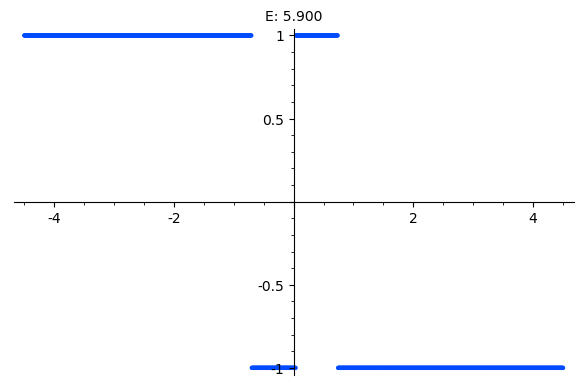

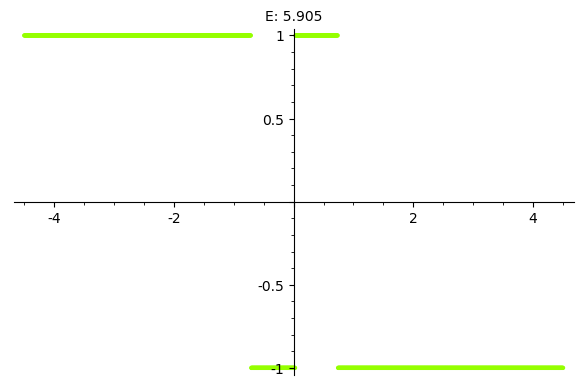

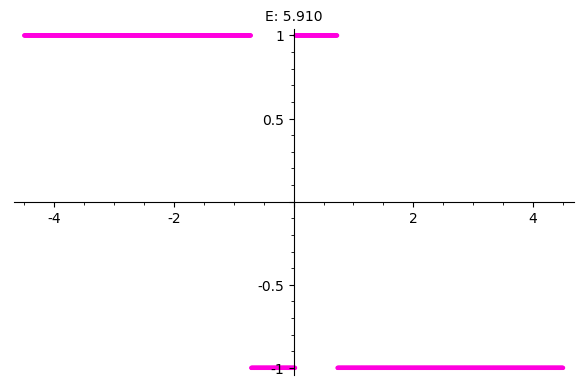

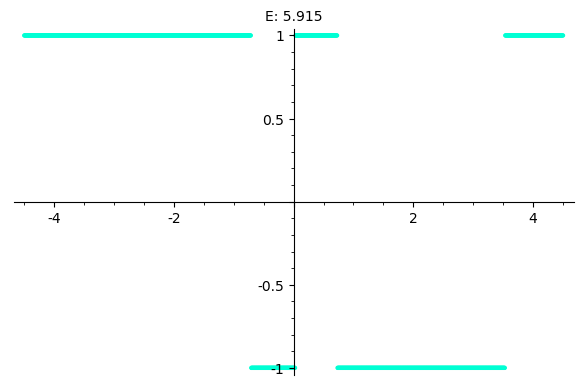

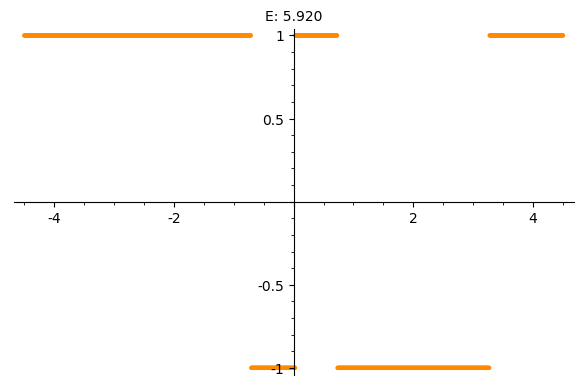

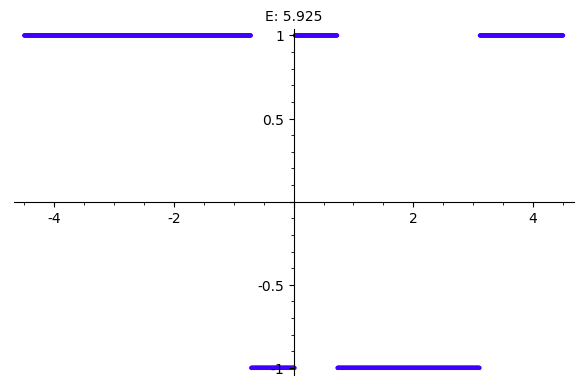

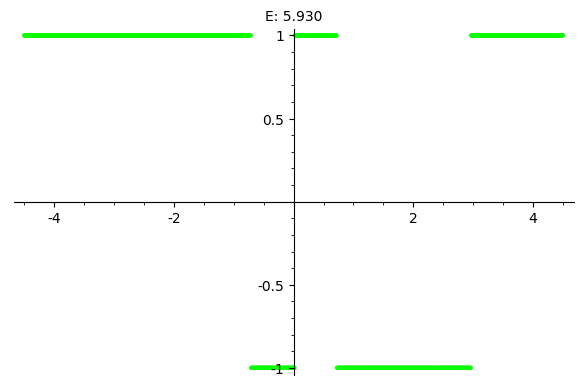

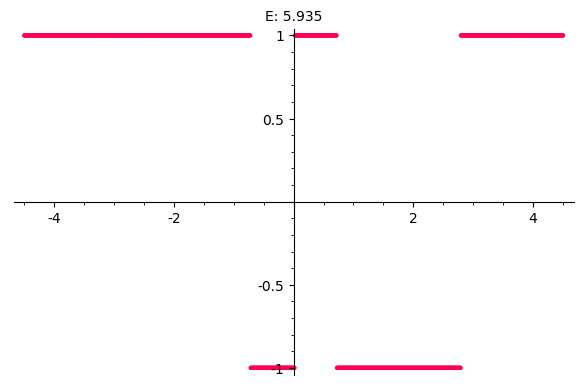

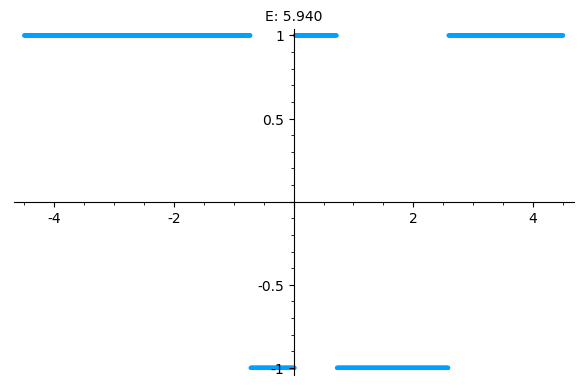

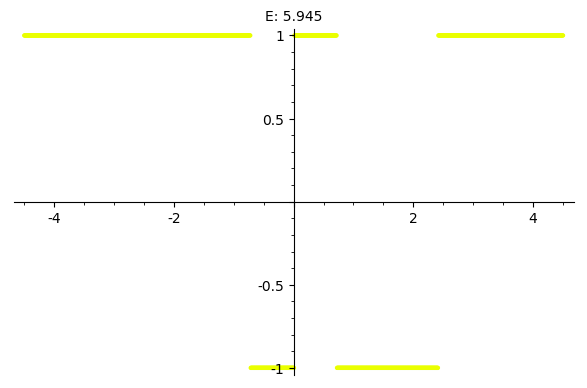

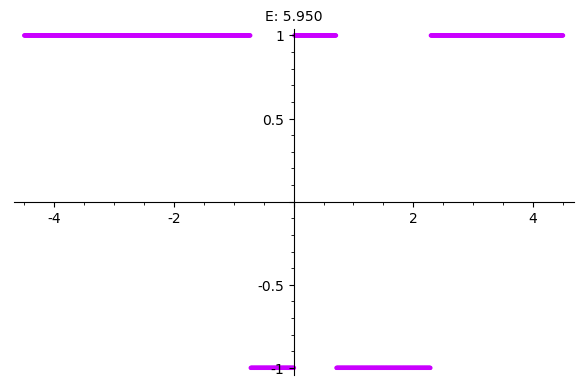

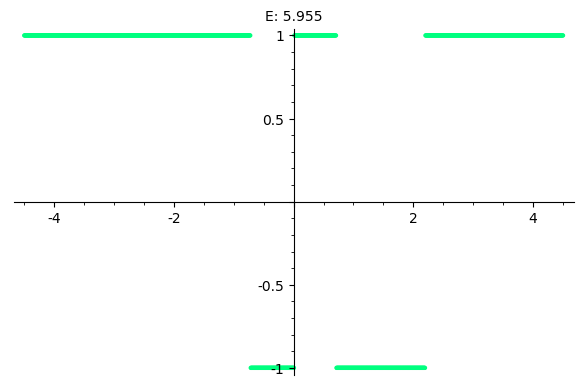

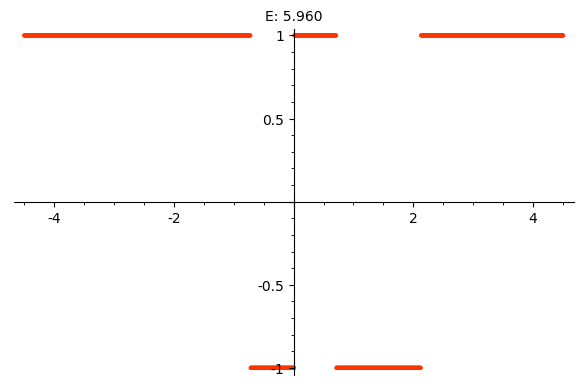

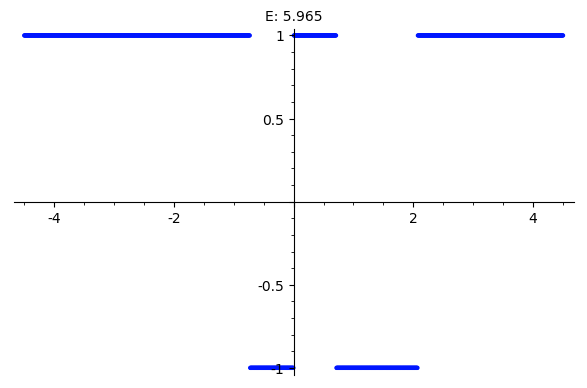

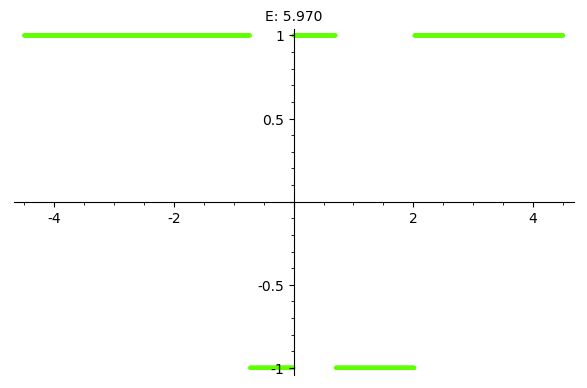

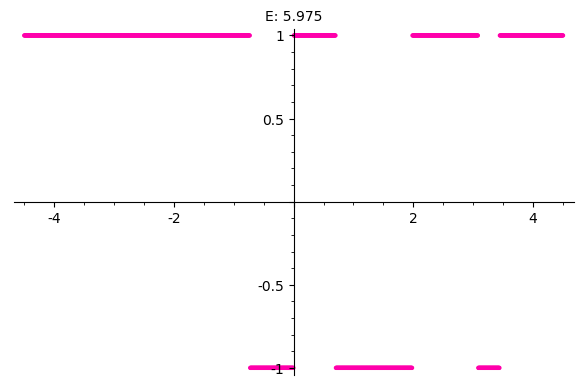

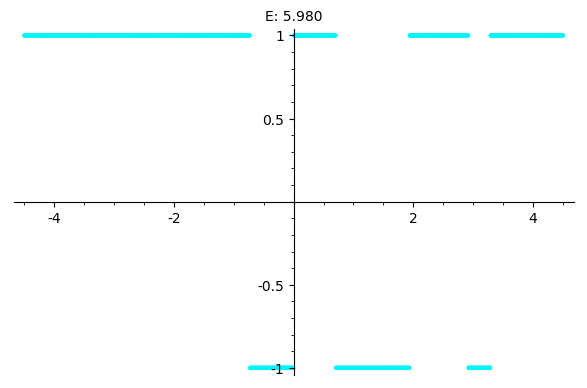

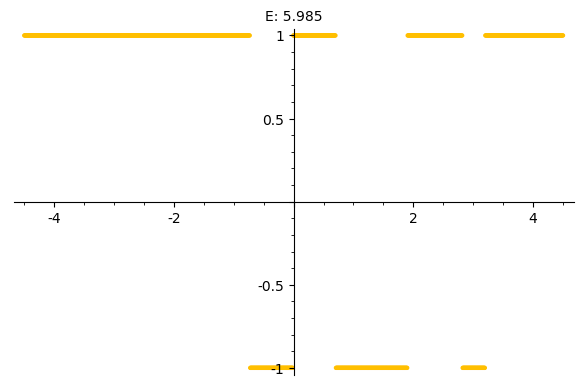

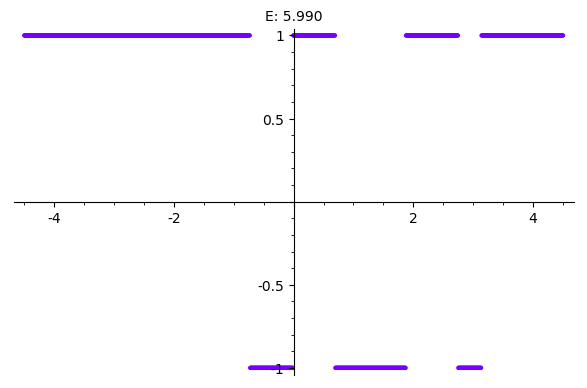

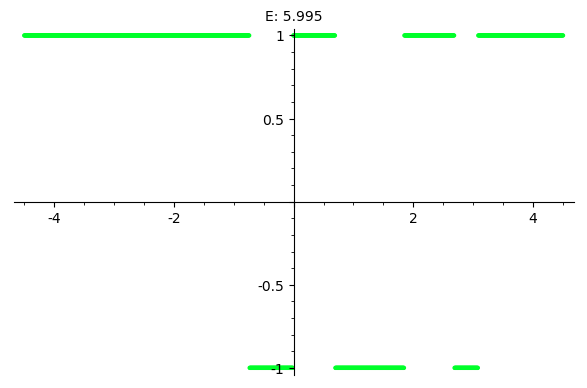

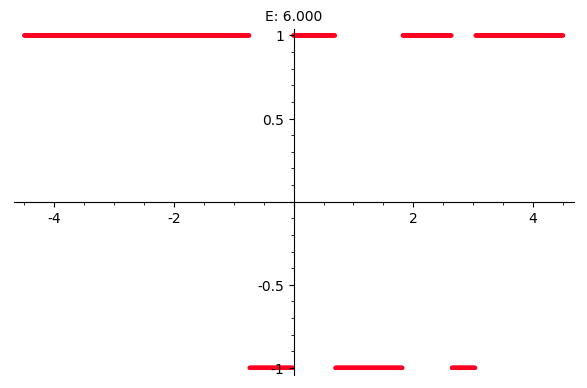

In [45]:
xs = np.linspace(-4.5, 4.5, 1000)
def transform(m):
    m = matrix(RDF, m)
    return [sign(det(m))]
    #return [real(e) if abs(imag(e)) < 1e-5 else 100 for e in m.eigenvalues()]
    c = 0
    for e in m.eigenvalues():
        if e >= 0:
            c += 1
    return (c,sign(det(m)))

for i, E in enumerate([5.9,5.905 .. 6]):
    ds3 = zip(*[transform(
            p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), -5.5, x)[0]
            # - p2d.propagate(E, matrix.zero(n,n), matrix.identity(n), 5.5, x)[0]
            ) for x in xs])
    (
        sum(list_plot(zip(xs, v), color=hue(golden_ratio*(i+1)*(j+1))) for j, v in enumerate(ds3))
    ).show(title="E: %.3f"%E, ymax=1, ymin=-1)

In [10]:
Es = [p2d.findEigenvalue(E) for E in [3,5.5,7.5,8,8.4,10,11,12.1,12.2]]
Es

[3.195918086420941,
 5.526743871575952,
 7.557803346040699,
 8.0312723869257,
 8.444581356396453,
 9.928060956271807,
 11.311817062095551,
 12.10325364367323,
 12.201179840237549]

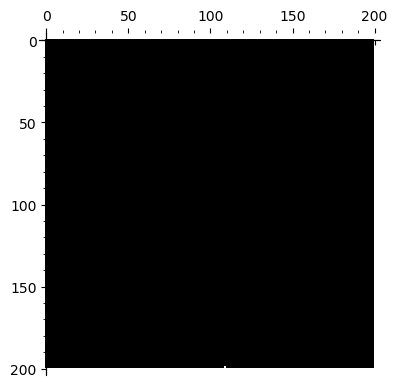

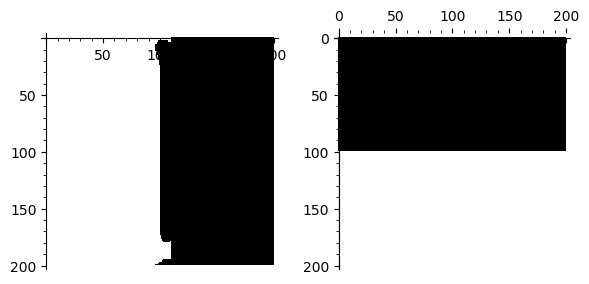

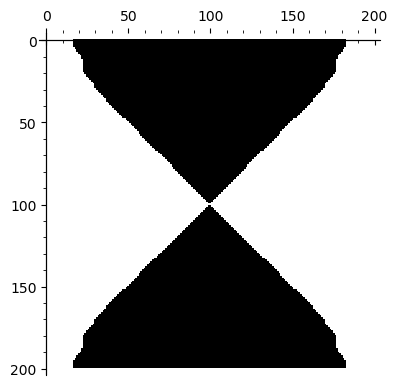

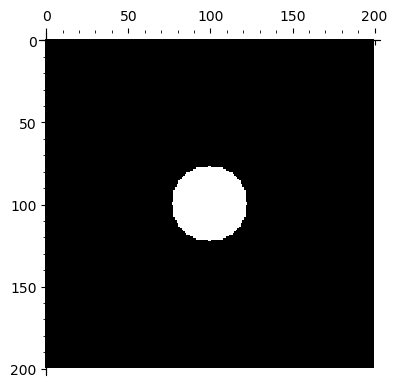

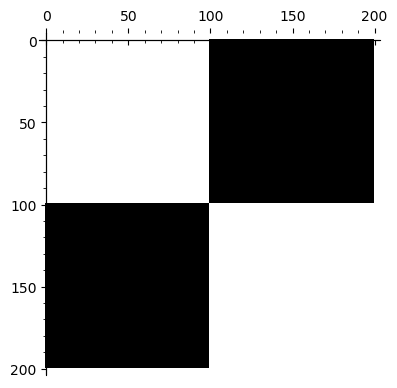

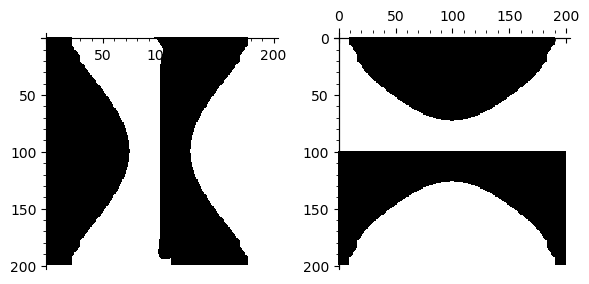

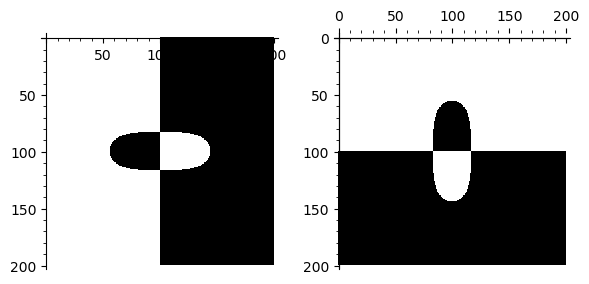

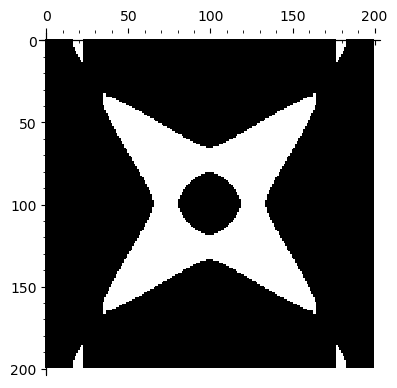

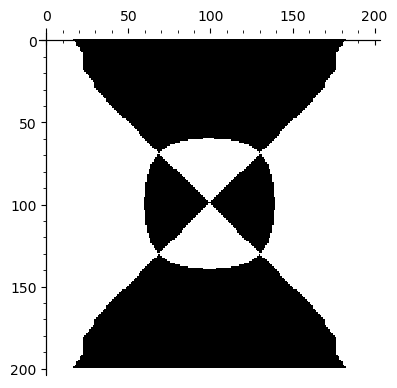

In [18]:
xs = np.linspace(-4,4,200)
ys = np.linspace(-4,4,200)
for E in Es:
    graphics_array([matrix_plot(np.sign(v)) for v in p2d.computeEigenfunction(E, xs, ys)]).show()